In [1]:
import pandas as pd
import numpy as np

import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

In [767]:
data = pd.read_excel('Data Set.xlsx')

In [768]:
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0
5,9662-FUSYIM-1IV,4,4.0,0,64,5,August,17,4,3,...,1,1,0,0,0,0,0,0,1,0
6,7432-QKQFJJ-K72,2,5.0,1,52,5,July,14,2,1,...,1,0,1,1,0,0,0,0,0,0
7,8959-RZWRHU-ST8,3,4.0,1,44,4,October,16,3,1,...,1,0,0,0,0,0,1,0,0,0
8,9124-DZALHM-S6I,2,3.0,1,66,6,October,12,2,1,...,1,0,0,0,0,0,0,1,0,0
9,3512-MUWBGY-52X,2,2.0,0,47,4,July,11,1,6,...,1,0,0,0,0,0,0,0,0,0


In [769]:
data['total_spend'] = data['cardspent']+data['card2spent']

In [770]:
# First drop
data.drop(['cardspent','card2spent'],axis=1,inplace=True)

In [771]:
# 2nd drop
# log dropping
data.drop([i for i in data.columns if 'ln' in i],axis=1,inplace=True)

In [772]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 116 entries, custid to total_spend
dtypes: float64(17), int64(97), object(2)
memory usage: 4.4+ MB


In [697]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
region,5000.0,3.001400,1.421760,1.00,2.000000,3.000000,4.00000,5.000000
townsize,4998.0,2.687275,1.425925,1.00,1.000000,3.000000,4.00000,5.000000
gender,5000.0,0.503600,0.500037,0.00,0.000000,1.000000,1.00000,1.000000
age,5000.0,47.025600,17.770338,18.00,31.000000,47.000000,62.00000,79.000000
agecat,5000.0,4.238800,1.308785,2.00,3.000000,4.000000,5.00000,6.000000
ed,5000.0,14.543000,3.281083,6.00,12.000000,14.000000,17.00000,23.000000
edcat,5000.0,2.672000,1.211738,1.00,2.000000,2.000000,4.00000,5.000000
jobcat,5000.0,2.752800,1.737900,1.00,1.000000,2.000000,4.00000,6.000000
union,5000.0,0.151200,0.358280,0.00,0.000000,0.000000,0.00000,1.000000
employ,5000.0,9.730400,9.690929,0.00,2.000000,7.000000,15.00000,52.000000


In [11]:
profile_report = pandas_profiling.ProfileReport(data)

In [12]:
profile_report.to_file(outputfile='pandas_profiling.html')

Separating cat and numeric vars. :

In [168]:
data['owndvd']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      0
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      0
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
4970    0
4971    1
4972    1
4973    1
4974    1
4975    0
4976    1
4977    1
4978    0
4979    1
4980    1
4981    1
4982    1
4983    1
4984    1
4985    1
4986    0
4987    1
4988    1
4989    1
4990    1
4991    1
4992    1
4993    1
4994    1
4995    1
4996    1
4997    1
4998    1
4999    1
Name: owndvd, Length: 5000, dtype: int64

In [773]:
data[['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat','retire','inccat','default','jobsat','marital','spousedcat','homeown','hometype','address',
     'addresscat','cars','carown','cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic',
     'commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat','card2',
     'card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid','callwait',
     'forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02','response_03']] = data[['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat','retire','inccat','default','jobsat','marital','spousedcat','homeown','hometype','address',
     'addresscat','cars','carown','cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic',
     'commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat','card2',
     'card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid','callwait',
     'forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02','response_03']].astype('object')

In [774]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 116 entries, custid to total_spend
dtypes: float64(16), int64(15), object(85)
memory usage: 4.4+ MB


In [775]:
# 3rd drop
# Useless cat dropping
#data.drop(['cardtenurecat','card2tenurecat'],axis=1,inplace=True)
data.drop(['bfast','churn','birthmonth','union','employ','inccat','address','carown','carbought','commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic',
           'commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty','vote','polcontrib','cardtenure','card2tenure','tollfree','equip','callcard','wireless','multline','voice','pager','callid',
           'callwait','forward','confer','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02','response_03'],axis=1,inplace=True)


In [776]:
# 4th drop
data.drop(['custid'],axis=1,inplace=True)

In [777]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 64 columns):
region            5000 non-null object
townsize          4998 non-null object
gender            5000 non-null object
age               5000 non-null int64
agecat            5000 non-null object
ed                5000 non-null int64
edcat             5000 non-null object
jobcat            5000 non-null object
empcat            5000 non-null object
retire            5000 non-null object
income            5000 non-null int64
debtinc           5000 non-null float64
creddebt          5000 non-null float64
othdebt           5000 non-null float64
default           5000 non-null object
jobsat            5000 non-null object
marital           5000 non-null object
spoused           5000 non-null int64
spousedcat        5000 non-null object
reside            5000 non-null int64
pets              5000 non-null int64
pets_cats         5000 non-null int64
pets_dogs         5000 non-null int64
p

Now dealing with numerical vars:

In [778]:
# separating numerical and categorical data
numeric_data = data.select_dtypes(include=['float32','float64','int32','int64'])
cat_data = data.select_dtypes(include=['object','O'])

In [780]:
cat_data.info()
#numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
region            5000 non-null object
townsize          4998 non-null object
gender            5000 non-null object
agecat            5000 non-null object
edcat             5000 non-null object
jobcat            5000 non-null object
empcat            5000 non-null object
retire            5000 non-null object
default           5000 non-null object
jobsat            5000 non-null object
marital           5000 non-null object
spousedcat        5000 non-null object
homeown           5000 non-null object
hometype          5000 non-null object
addresscat        5000 non-null object
cars              5000 non-null object
cartype           5000 non-null object
carcatvalue       5000 non-null object
carbuy            5000 non-null object
commute           5000 non-null object
card              5000 non-null object
cardtype          5000 non-null object
cardbenefit       5000 non-null obj

In [781]:
# before useless var. removal
len(numeric_data.columns)
numeric_data.columns

Index(['age', 'ed', 'income', 'debtinc', 'creddebt', 'othdebt', 'spoused',
       'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds',
       'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish',
       'carvalue', 'commutetime', 'tenure', 'longmon', 'longten', 'tollmon',
       'tollten', 'equipmon', 'equipten', 'cardmon', 'cardten', 'wiremon',
       'wireten', 'hourstv', 'total_spend'],
      dtype='object')

In [782]:
# 5th drop(selection from num. vars.)
numeric_data = numeric_data[['total_spend', 'income', 'creddebt','debtinc','othdebt','tenure','longten','tollten','equipten','cardten','wireten']]

In [783]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
total_spend    5000 non-null float64
income         5000 non-null int64
creddebt       5000 non-null float64
debtinc        5000 non-null float64
othdebt        5000 non-null float64
tenure         5000 non-null int64
longten        4997 non-null float64
tollten        5000 non-null float64
equipten       5000 non-null float64
cardten        4998 non-null float64
wireten        5000 non-null float64
dtypes: float64(9), int64(2)
memory usage: 429.8 KB


In [220]:
data['hourstv'].value_counts()
#data['ed'].dtype

20    451
19    445
21    440
18    413
22    371
17    350
16    309
23    301
15    263
24    248
25    237
14    184
26    162
13    136
27    127
12     97
28     89
0      85
29     73
11     53
30     42
10     32
31     30
9      13
32     10
34      9
8       9
33      8
35      6
36      3
7       3
6       1
Name: hourstv, dtype: int64

In [546]:
# adding  'reside','pets' as cat var(reside,pets are useless,so dropped it)
#cat_data[[ 'reside','pets']] =  data[[ 'reside','pets']]
#cat_data[[ 'reside','pets']] = cat_data[[ 'reside','pets']].astype('object')

C:\Users\mac\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Data pre-processing :

In [710]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [784]:
num_summary = numeric_data.apply(var_summary).T

In [785]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
total_spend,5000.0,0.0,2.490393e+06,498.078630,414.250000,351.529270,1.235728e+05,0.705771,8.11,58.197600,133.106000,184.033000,276.282500,414.250000,615.56250,908.125000,1145.146500,1760.102400,4881.050000
income,5000.0,0.0,2.737980e+05,54.759600,38.000000,55.377511,3.066669e+03,1.011284,9.00,9.000000,13.000000,16.000000,24.000000,38.000000,67.00000,109.100000,147.000000,272.010000,1073.000000
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,1.839059,0.00,0.033160,0.101088,0.175682,0.385520,0.926437,2.06382,4.299470,6.373010,14.280358,109.072596
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.642925,0.00,0.700000,1.900000,2.800000,5.100000,8.800000,13.60000,18.600000,22.200000,29.200000,43.100000
othdebt,5000.0,0.0,1.827230e+04,3.654460,2.098540,5.395172,2.910788e+01,1.476325,0.00,0.114299,0.287692,0.457997,0.980301,2.098540,4.31478,8.062046,11.815981,24.064260,141.459150
tenure,5000.0,0.0,1.910240e+05,38.204800,38.000000,22.661888,5.135612e+02,0.593169,0.00,1.000000,4.000000,7.000000,18.000000,38.000000,59.00000,69.000000,72.000000,72.000000,72.000000
longten,4997.0,3.0,3.542232e+06,708.871753,350.000000,979.291072,9.590110e+05,1.381478,0.90,2.400000,12.620000,28.290000,104.600000,350.000000,913.85000,1808.840000,2567.650000,4689.066000,13046.500000
tollten,5000.0,0.0,2.889163e+06,577.832510,0.000000,949.151586,9.008887e+05,1.642607,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,885.45000,1918.955000,2620.212500,3977.270500,6923.450000
equipten,5000.0,0.0,2.350882e+06,470.176400,0.000000,912.220624,8.321465e+05,1.940167,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,510.16250,1912.325000,2600.990000,3679.457500,6525.300000
cardten,4998.0,2.0,3.600951e+06,720.478391,425.000000,922.225527,8.504999e+05,1.280018,0.00,0.000000,0.000000,0.000000,0.000000,425.000000,1080.00000,1871.500000,2455.750000,4011.200000,13705.000000


In [786]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [787]:
# DON'T RE-RUN THIS STEP
numeric_data = numeric_data.apply(outlier_capping)

In [788]:
#Handling missings values
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

In [789]:
numeric_data = numeric_data.apply(Missing_imputation)

In [790]:
# Dummy creation
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [791]:
for x in cat_data.columns:
    cat_data[x] = cat_data[x].astype('category')
    cat_data = create_dummies(cat_data,x)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [792]:
cat_data

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,internet_1,internet_2,internet_3,internet_4,ebill_1
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
2,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
5,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
7,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
9,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [793]:
data_updated = pd.concat([numeric_data, cat_data], axis=1)

In [794]:
data_updated.head()

,total_spend,income,creddebt,debtinc,othdebt,tenure,longten,tollten,equipten,cardten,...,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,internet_1,internet_2,internet_3,internet_4,ebill_1
0,149.46,31.0,1.200909,11.1,2.240091,5.0,34.40,161.05,126.1,60.0,...,1,0,0,0,0,0,0,0,0,0
1,77.54,15.0,1.222020,18.6,1.567980,39.0,330.60,0.00,1975.0,610.0,...,1,0,0,0,1,0,0,0,1,1
2,359.97,35.0,0.928620,9.9,2.536380,65.0,1858.35,0.00,0.0,1410.0,...,0,0,0,1,0,0,0,0,0,0
3,359.41,20.0,0.033160,5.7,1.117200,36.0,199.45,0.00,0.0,685.0,...,1,0,0,0,1,0,1,0,0,1
4,507.83,23.0,0.214659,1.7,0.176341,21.0,74.10,387.70,0.0,360.0,...,0,1,0,0,1,0,0,1,0,0


In [795]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 105 entries, region_2 to ebill_1
dtypes: uint8(105)
memory usage: 512.8 KB


In [796]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 116 entries, total_spend to ebill_1
dtypes: float64(11), uint8(105)
memory usage: 942.5 KB


In [797]:
data_updated.isnull().any().sum()

0

<strong>y should be normal distributed</strong>

C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


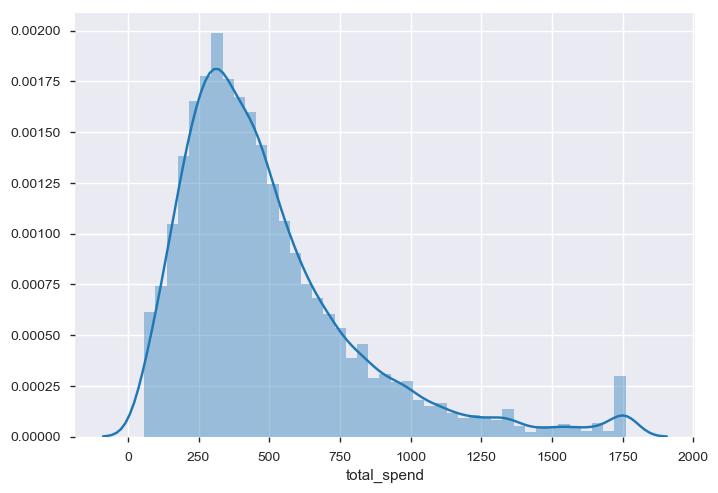

In [798]:
sns.distplot(data_updated['total_spend'])
plt.show()

In [799]:
data_updated['ln_total_spend'] = np.log(data_updated['total_spend'])

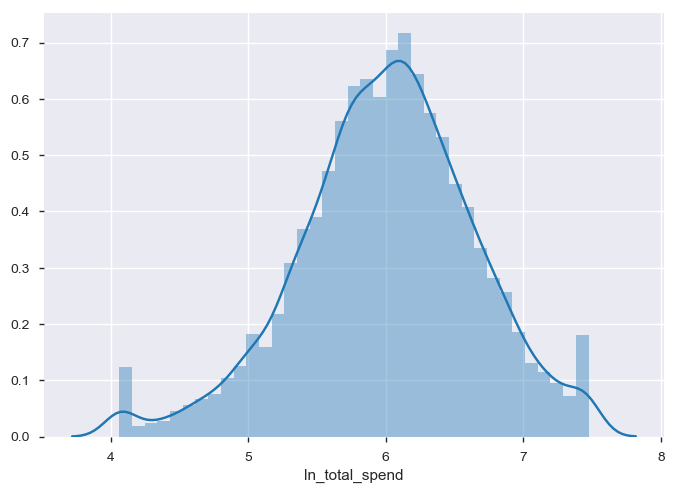

In [800]:
sns.distplot(data_updated['ln_total_spend'])
plt.show()

In [801]:
# 6th drop
data_updated.drop(['total_spend'],axis=1,inplace=True)

Studying correlation:

In [802]:
data_updated.corr()

,income,creddebt,debtinc,othdebt,tenure,longten,tollten,equipten,cardten,wireten,...,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,internet_1,internet_2,internet_3,internet_4,ebill_1,ln_total_spend
income,1.000000,0.627578,0.011586,0.696227,0.237003,0.199178,0.285782,0.164405,0.197012,0.253034,...,-0.044097,0.027294,0.220316,-0.070016,0.026915,-0.012050,0.029947,0.056976,0.056131,0.355851
creddebt,0.627578,1.000000,0.462598,0.640411,0.149706,0.128485,0.170792,0.103360,0.121338,0.142524,...,-0.048379,0.025363,0.146879,-0.049982,0.017297,-0.009413,0.004650,0.037037,0.027743,0.233370
debtinc,0.011586,0.462598,1.000000,0.526964,0.018607,0.014390,0.005262,0.011433,0.015836,0.008982,...,-0.019937,-0.000503,0.030573,-0.002852,0.013924,-0.017080,-0.004883,0.002058,-0.009066,0.016104
othdebt,0.696227,0.640411,0.526964,1.000000,0.181624,0.147489,0.205918,0.125057,0.147055,0.194315,...,-0.048026,0.023256,0.173451,-0.052224,0.037497,-0.013542,0.017066,0.037096,0.040180,0.260430
tenure,0.237003,0.149706,0.018607,0.181624,1.000000,0.758347,0.454132,0.282105,0.724275,0.271230,...,-0.213867,0.047447,0.796195,-0.160621,-0.004026,-0.045656,-0.039138,-0.063138,-0.095115,0.053159
longten,0.199178,0.128485,0.014390,0.147489,0.758347,1.000000,0.378476,0.181681,0.684236,0.195403,...,-0.236569,-0.111836,0.661149,-0.123261,0.005892,-0.033923,-0.030693,-0.055649,-0.084999,0.035730
tollten,0.285782,0.170792,0.005262,0.205918,0.454132,0.378476,1.000000,0.224215,0.430540,0.516924,...,-0.125863,-0.005329,0.381854,-0.067282,-0.005415,-0.035818,-0.003737,-0.013152,-0.048836,0.086512
equipten,0.164405,0.103360,0.011433,0.125057,0.282105,0.181681,0.224215,1.000000,0.205755,0.590291,...,-0.037240,0.048694,0.194993,-0.032785,0.008419,0.145874,0.168288,0.304312,0.417410,0.081837
cardten,0.197012,0.121338,0.015836,0.147055,0.724275,0.684236,0.430540,0.205755,1.000000,0.267405,...,-0.225935,-0.075160,0.634094,-0.102217,0.007043,-0.033798,-0.035552,-0.050724,-0.080814,0.028495
wireten,0.253034,0.142524,0.008982,0.194315,0.271230,0.195403,0.516924,0.590291,0.267405,1.000000,...,-0.059913,0.038404,0.207513,-0.050687,0.017613,0.096539,0.078410,0.240723,0.278796,0.097513


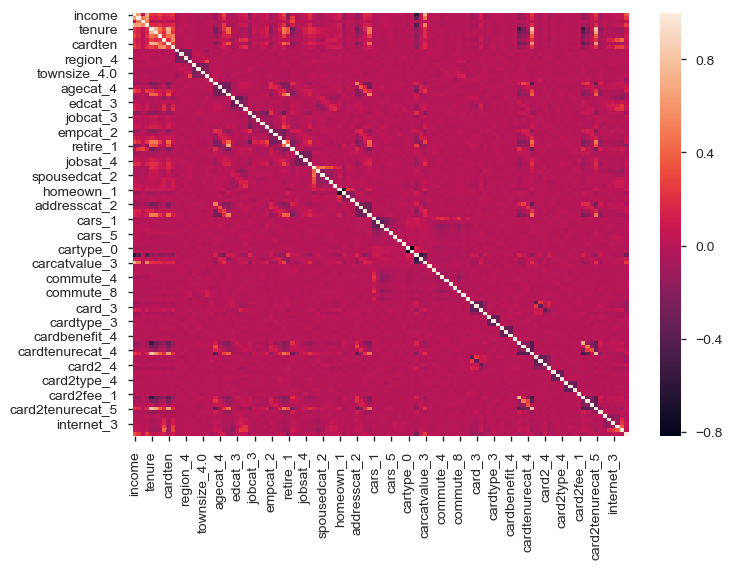

In [803]:
sns.heatmap(data_updated.corr())
plt.show()

In [804]:
log_df = np.log(data_updated[['income', 'creddebt', 'othdebt',  'longten',  'tollten',  'equipten', 'cardten',  'wireten']]+1)

In [805]:
data_updated_final = pd.concat([data_updated[[i for i in data_updated.columns if i not in ['income', 'creddebt', 'othdebt', 'longmon', 'longten', 'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon', 'cardten', 'wiremon', 'wireten']]],
           log_df],axis=1)

In [806]:
data_updated = data_updated_final

In [807]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 116 entries, debtinc to wireten
dtypes: float64(11), uint8(105)
memory usage: 942.5 KB


### Variable Reduction :

In [808]:
feature_col = data_updated.columns.difference(['ln_total_spend'])

In [901]:
train_X,test_X,train_Y,test_Y = train_test_split( data_updated[feature_col],
                                                  data_updated['ln_total_spend'],
                                                  test_size = 0.3,
                                                  random_state = 123)

In [810]:
# for statsmodel
train,test = train_test_split( data_updated,
                              test_size = 0.3,
                              random_state = 1234)

In [811]:
train_X.columns

Index(['active_1', 'addresscat_2', 'addresscat_3', 'addresscat_4',
       'addresscat_5', 'agecat_3', 'agecat_4', 'agecat_5', 'agecat_6',
       'carbuy_1',
       ...
       'spousedcat_3', 'spousedcat_4', 'spousedcat_5', 'tenure', 'tollten',
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0',
       'wireten'],
      dtype='object', length=115)

#### F-regression :

In [571]:
from sklearn.feature_selection import f_regression

In [812]:
features = train_X
target = train_Y
F_values, p_values  = f_regression(features, target )

In [813]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [814]:
f_reg_results.sort_values('F_Value',ascending=False,inplace=True)

In [920]:
# selecting top 50 vars.
f_reg_final = f_reg_results.head(50)
#f_reg_results.head(45)

In [921]:
cool = f_reg_final['Variable'].values

In [922]:
cool

array(['income', 'othdebt', 'carcatvalue_3', 'creddebt', 'carcatvalue_1',
       'retire_1', 'agecat_5', 'agecat_6', 'card_2', 'card_3', 'wireten',
       'card2_2', 'jobcat_2', 'card_4', 'carcatvalue_2', 'card2_3',
       'hometype_2', 'internet_4', 'agecat_4', 'equipten', 'tollten',
       'gender_1', 'card2_4', 'homeown_1', 'internet_3', 'empcat_5',
       'addresscat_4', 'edcat_2', 'card_5', 'cardtenurecat_5',
       'card2tenurecat_2', 'longten', 'card2_5', 'edcat_5', 'tenure',
       'jobsat_5', 'card2benefit_3', 'edcat_4', 'jobcat_3', 'edcat_3',
       'spousedcat_1', 'region_5', 'jobsat_4', 'spousedcat_4', 'empcat_4',
       'commute_4', 'addresscat_3', 'cardtenurecat_3', 'ebill_1',
       'addresscat_2'], dtype=object)

In [923]:
train_X,test_X,train_Y,test_Y = train_test_split(data_updated[cool],
                                                 data_updated['ln_total_spend'],
                                                 test_size=0.30, 
                                                 random_state=1234)

#### Select K-Best :

In [257]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [459]:
X_kbest = SelectKBest(f_regression, k=30).fit(train_X, train_Y )

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [460]:
X_kbest.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [461]:
X_kbest.scores_

array([3.74509788e-01, 1.27138517e+01, 1.86897474e+00, 1.52888730e+00,
       9.67561167e-02, 1.27928270e-01, 6.81053915e-01, 3.21127010e+00,
       7.90448069e-01, 3.79381468e+00, 2.34288281e+00, 8.88486009e-01,
       2.99256293e+00, 5.99658098e-01, 1.53870926e-02, 3.86471516e+00,
       3.42591269e+00, 1.08352706e-01, 1.25113501e+00, 3.21823154e+00,
       5.32505983e-03, 3.48592758e+00, 1.28823982e+00, 1.08732290e+01,
       6.32066536e-04, 1.87458943e-01, 5.00605506e+00, 1.93979513e-03,
       1.86027630e-01, 3.36198223e-01, 2.56983615e-01, 4.30687425e-01,
       2.78632945e-02, 1.27514163e-01, 3.83699890e+00, 1.70322820e-01,
       4.99824968e-02, 9.52758749e-01, 4.36703141e-01, 2.18746535e-01,
       1.20765169e-01, 4.37701323e-01, 1.52386990e+00, 2.56136481e+00,
       2.13674629e+00, 5.38000060e-03, 1.05008290e+00, 5.86300828e-02,
       6.97386258e-02, 1.04520340e+00,            nan, 2.59555081e+00,
       1.23066705e+00, 1.11076062e+00, 7.36155561e-01, 7.32500084e-01,
      

In [462]:
# summarize the selection of the attributes
KBest_features=train_X.columns[X_kbest.get_support()]

selected_features_from_KBest = train_X[KBest_features]

In [463]:
selected_features_from_KBest.head()

,agecat_5,agecat_6,carcatvalue_1,carcatvalue_3,card2_2,card_2,card_3,carown_0,carown_1,carvalue,...,othdebt,owncd_1,owndvd_1,owntv_1,ownvcr_1,reason_2,retire_1,tollten,wiremon,wireten
4036,0,1,0,0,1,0,0,0,1,22.0,...,4.809000,1,1,1,1,0,1,0.0,0.00,0.00
2883,0,1,0,0,0,1,0,0,1,22.4,...,2.146464,1,1,1,1,0,0,0.0,0.00,0.00
4162,0,0,0,0,1,0,0,0,1,23.1,...,1.077804,1,1,1,1,0,0,664.2,40.86,1117.15
4640,0,0,0,0,0,1,0,0,1,23.5,...,6.905655,1,1,1,1,0,0,588.3,0.00,0.00
2430,0,0,1,0,0,0,0,0,1,18.6,...,1.683648,1,1,1,1,0,0,774.6,0.00,0.00


In [464]:
KBest_features

Index(['agecat_5', 'agecat_6', 'carcatvalue_1', 'carcatvalue_3', 'card2_2',
       'card_2', 'card_3', 'carown_0', 'carown_1', 'carvalue', 'creddebt',
       'equipten', 'inccat_3', 'inccat_4', 'inccat_5', 'income', 'jobcat_2',
       'lncreddebt', 'lninc', 'lnothdebt', 'othdebt', 'owncd_1', 'owndvd_1',
       'owntv_1', 'ownvcr_1', 'reason_2', 'retire_1', 'tollten', 'wiremon',
       'wireten'],
      dtype='object')

#### RFE :

In [264]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [265]:
model = LinearRegression()
rfe = RFE(model, 15)
rfe = rfe.fit(train_X, train_Y )

In [266]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True  True
  True False False False False False False False False False False False
 False False False False  True  True  True  True False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
[ 92  70  77 113  40  41  42  46  47  69   1   1   1   2   4   3   5  51
  59 111  93 109  21  20  18  91 102  98   1   1   1   1 116 100 101 103
 

In [267]:
#Alternative of capturing the important variables
RFE_features=train_X.columns[rfe.get_support()]
RFE_features

Index(['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card_2', 'card_3',
       'card_4', 'card_5', 'cars_1', 'cars_2', 'cars_3', 'cars_4', 'cars_5',
       'cars_6', 'cars_7', 'cars_8'],
      dtype='object')

#### VIF :

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [271]:
a,b = dmatrices(formula_like='ln_total_spend ~ agecat_5+agecat_6+carcatvalue_1+carcatvalue_3+card2_2+card_2+card_3+creddebt+equipten+income+jobcat_2+othdebt+retire_1+tollten+wireten', data = data_updated, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor       features
0     9.865031      Intercept
1     1.328319       agecat_5
2     2.123777       agecat_6
3     1.577016  carcatvalue_1
4     2.200385  carcatvalue_3
5     1.157061        card2_2
6     1.249208         card_2
7     1.156654         card_3
8     1.908582       creddebt
9     1.572974       equipten
10    4.138571         income
11    1.079026       jobcat_2
12    2.251939        othdebt
13    2.097355       retire_1
14    1.514949        tollten
15    2.052598        wireten


<strong>feature testing:</strong>

In [ ]:
RFE = ['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card_2', 'card_3',
       'card_4', 'card_5', 'cars_1', 'cars_2', 'cars_3', 'cars_4', 'cars_5',
       'cars_6', 'cars_7', 'cars_8']

select kbest = ['agecat_5', 'agecat_6', 'carcatvalue_1', 'carcatvalue_3', 'card2_2',
                'card_2', 'card_3', 'creddebt', 'equipten', 'income', 'jobcat_2',
                'othdebt', 'retire_1', 'tollten', 'wireten' ]

f-regression = ['income','carcatvalue_3','carcatvalue_1','othdebt','creddebt','retire_1','agecat_5','agecat_6','wireten,
                'card_2','card_3','equipten','card2_2','tollten','jobcat_2']



first iteration => retire_1+income+card_2+card_3+reason_2+carvalue+creddebt+othdebt+carown_1+carcatvalue_1+carcatvalue_3+carown_0
(tough selection=17%)

second iteration => 'agecat_5+agecat_6+carcatvalue_1+carcatvalue_3+card2_2+card_2+card_3+creddebt+equipten+income+jobcat_2+othdebt+retire_1+tollten+wireten'
(tougher selection from 1st iteration=20%)

Third iteration => 'agecat_5+agecat_6+carcatvalue_1+carcatvalue_3+card2_2+card_2+card_3+carown_0+carown_1+carvalue+ed+equipten+inccat_3+inccat_4+inccat_5+lncreddebt+lninc+lnothdebt+owncd_1+owndvd_1+owntv_1+ownvcr_1+reason_2+retire_1+wireless_1+wiremon+wireten
(From all vars.=22.9%)


In [316]:
log = np.log(data_updated['othdebt']+1)
sqr = np.sqrt(data_updated['othdebt'])
sq = np.square(data_updated['othdebt'])
ex = np.exp(data_updated['othdebt'])

In [317]:
print(data_updated['ln_total_spend'].corr(data_updated['othdebt']))
print(data_updated['ln_total_spend'].corr(log))
print(data_updated['ln_total_spend'].corr(sqr))
print(data_updated['ln_total_spend'].corr(sq))
print(data_updated['ln_total_spend'].corr(ex))

0.26043000277367967
0.2843000322567626
0.2821822238312787
0.20256436183476653
0.10955572746798435


In [ ]:
data_updated['equipten']==square
data_updated['creddebt']==log
data_updated['income']==log

data_updated['othdebt']==log
data_updated['tollten']==normal
data_updated['wireten']==normal

In [309]:
train_2 = train

In [318]:
train_2['equipten'] = np.square(train['equipten'])
train_2['creddebt'] = np.log(train['creddebt']+1)
train_2['income'] = np.log(train['income']+1)
train_2['othdebt'] = np.log(train['othdebt']+1)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

### Model Building :

#### Using Linear Regression(using statsmodel) :

In [749]:
import statsmodels.api as sm

In [824]:
X_col = sm.add_constant(train_X)

In [825]:
model = sm.OLS(train_Y,X_col)

In [826]:
result = model.fit()

In [827]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_total_spend   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     36.88
Date:                Sun, 11 Aug 2019   Prob (F-statistic):          1.51e-278
Time:                        14:45:17   Log-Likelihood:                -2708.4
No. Observations:                3500   AIC:                             5519.
Df Residuals:                    3449   BIC:                             5833.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5099      0.126     43.560      0.000       5.262       5.758
income               0.3952      0.031     12.895      0.000       0.335       0.455
othdebt             -0.0057      0.020     -0.285      0.776      -0.045       0.033
carcatvalue_3       -0.0750      0.044     -1.692      0.091      -0.162       0.012
creddebt             0.0128      0.021      0.612      0.541      -0.028       0.054
carcatvalue_1       -0.0152      0.034     -0.447      0.655      -0.082       0.051
retire_1             0.0078      0.043      0.180      0.858      -0.077       0.093
agecat_5            -0.0542      0.037     -1.483      0.138      -0.126       0.017
agecat_6            -0.0699      0.043     -1.632      0.103      -0.154       0.014
card_2              -0.5884      0.029    -20.255      0.000      -0.645      -0.531
card_3              -0.6241      0.029    -21.502      0.000      -0.681      -0.567
wireten              0.0021      0.004      0.551      0.582      -0.005       0.009
card2_2             -0.4086      0.030    -13.808      0.000      -0.467      -0.351
jobcat_2             0.0025      0.022      0.114      0.909      -0.041       0.046
card_4              -0.7079      0.030    -23.867      0.000      -0.766      -0.650
carcatvalue_2       -0.0640      0.035     -1.818      0.069      -0.133       0.005
card2_3             -0.3967      0.029    -13.502      0.000      -0.454      -0.339
hometype_2           0.0192      0.028      0.683      0.494      -0.036       0.074
internet_4           0.0512      0.033      1.546      0.122      -0.014       0.116
agecat_4            -0.0245      0.032     -0.765      0.444      -0.087       0.038
equipten            -0.0025      0.004     -0.688      0.492      -0.010       0.005
tollten             -0.0033      0.003     -1.097      0.273      -0.009       0.003
gender_1            -0.0583      0.018     -3.228      0.001      -0.094      -0.023
card2_4             -0.4312      0.032    -13.506      0.000      -0.494      -0.369
homeown_1            0.0294      0.027      1.082      0.279      -0.024       0.083
internet_3           0.0663      0.030      2.187      0.029       0.007       0.126
empcat_5            -0.0055      0.035     -0.157      0.875      -0.075       0.064
addresscat_4        -0.0360      0.027     -1.324      0.185      -0.089       0.017
edcat_2             -0.0607      0.027     -2.222      0.026      -0.114      -0.007
card_5              -0.5256      0.049    -10.767      0.000      -0.621      -0.430
cardtenurecat_5     -0.0598      0.035     -1.711      0.087      -0.128       0.009
card2tenurecat_2     0.0178      0.027      0.661      0.509      -0.035       0.071
longten              0.0080      0.016      0.503      0.615      -0.023       0.039
card2_5             -0.

### Applying cook's distance to remove outliers :

In [828]:
infl = result.get_influence()
infl

In [829]:
leverage = infl.hat_matrix_diag
leverage

array([0.0118574 , 0.0194651 , 0.01650213, ..., 0.0114648 , 0.01723088,
       0.01504247])

In [830]:
#de = pd.Series(infl.cooks_distance[1])
cook_d = infl.cooks_distance
cook_d

(array([8.10533346e-04, 1.28255956e-04, 2.89146784e-04, ...,
        4.35610982e-06, 1.08677312e-04, 6.75314934e-06]),
 array([1., 1., 1., ..., 1., 1., 1.]))

In [831]:
stand_residuals = infl.resid_studentized_internal
stand_residuals

array([ 1.85603302, -0.57402008, -0.93747764, ...,  0.13840357,
       -0.5622463 ,  0.15017147])

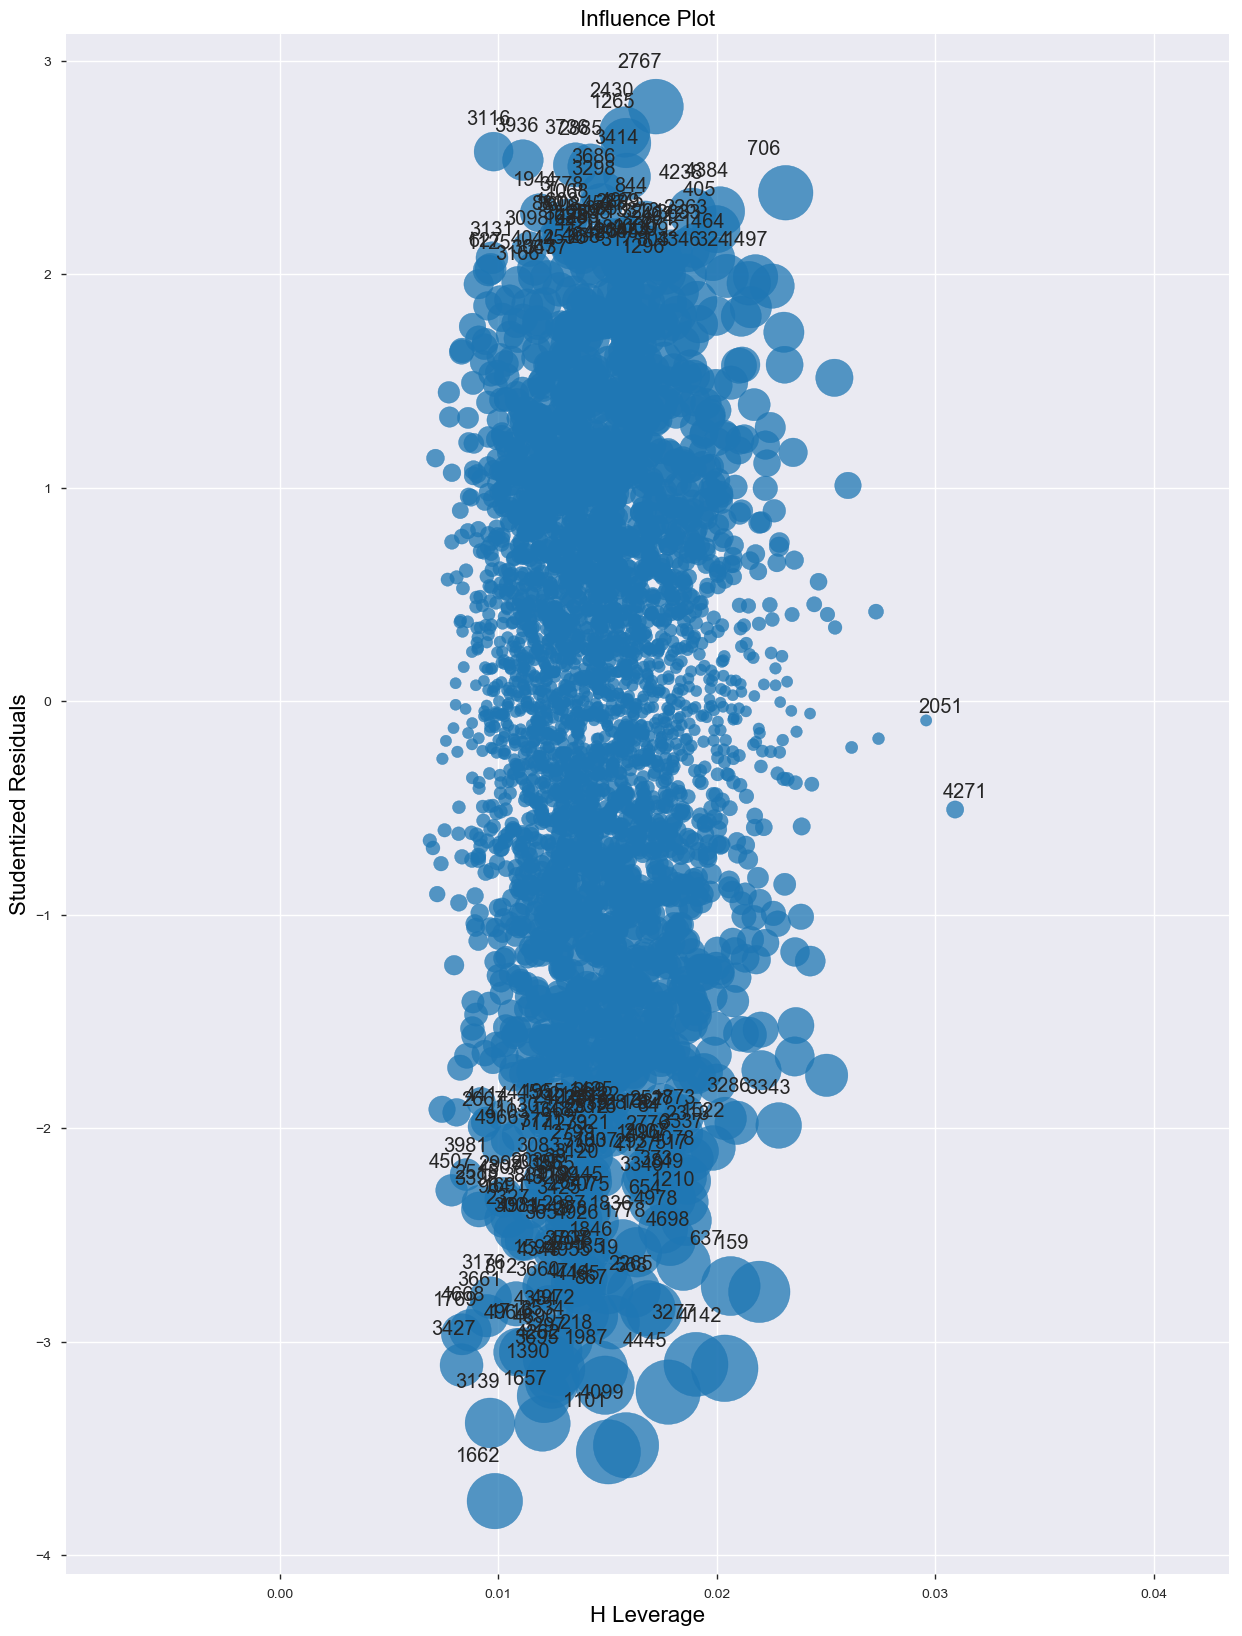

In [840]:
fig, ax = plt.subplots(figsize=(15,20))
fig = sm.graphics.influence_plot(result, ax= ax, criterion="cooks")

In [841]:
indexToConsider=[i for i in train_X.index if i not in [2051,4271,706,1662,3427,3139,1657,2767,706,1662,3427,1390,4445,1101,
                                                       4099,3277,4142,159,637,4689,1987,3176,3981,4507,3343,3286,
                                                      2430,1265,3116,3936,3414,3686,1944,844,3131,3098,405,1497,1464,4238,4884]]

In [932]:
X_col = sm.add_constant(train_X.loc[indexToConsider])
model = sm.OLS(train_Y.loc[indexToConsider],X_col)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_total_spend   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     38.62
Date:                Sun, 11 Aug 2019   Prob (F-statistic):          1.04e-289
Time:                        20:50:44   Log-Likelihood:                -2565.9
No. Observations:                3462   AIC:                             5234.
Df Residuals:                    3411   BIC:                             5547.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4654      0.124     44.205      0.000       5.223       5.708
income               0.4012      0.030     13.428      0.000       0.343       0.460
othdebt             -0.0071      0.019     -0.367      0.714      -0.045       0.031
carcatvalue_3       -0.0975      0.043     -2.247      0.025      -0.183      -0.012
creddebt             0.0085      0.020      0.417      0.677      -0.032       0.049
carcatvalue_1       -0.0210      0.033     -0.635      0.526      -0.086       0.044
retire_1             0.0039      0.042      0.093      0.926      -0.079       0.086
agecat_5            -0.0502      0.036     -1.411      0.158      -0.120       0.020
agecat_6            -0.0806      0.042     -1.939      0.053      -0.162       0.001
card_2              -0.5831      0.028    -20.612      0.000      -0.639      -0.528
card_3              -0.6103      0.028    -21.622      0.000      -0.666      -0.555
wireten              0.0008      0.004      0.231      0.818      -0.006       0.008
card2_2             -0.4112      0.029    -14.290      0.000      -0.468      -0.355
jobcat_2             0.0040      0.022      0.185      0.853      -0.038       0.047
card_4              -0.6986      0.029    -24.239      0.000      -0.755      -0.642
carcatvalue_2       -0.0750      0.034     -2.179      0.029      -0.143      -0.008
card2_3             -0.3918      0.029    -13.710      0.000      -0.448      -0.336
hometype_2           0.0383      0.027      1.398      0.162      -0.015       0.092
internet_4           0.0485      0.032      1.509      0.132      -0.015       0.112
agecat_4            -0.0337      0.031     -1.082      0.279      -0.095       0.027
equipten            -0.0037      0.004     -1.044      0.297      -0.011       0.003
tollten             -0.0036      0.003     -1.227      0.220      -0.009       0.002
gender_1            -0.0541      0.018     -3.078      0.002      -0.089      -0.020
card2_4             -0.4236      0.031    -13.629      0.000      -0.485      -0.363
homeown_1            0.0428      0.027      1.611      0.107      -0.009       0.095
internet_3           0.0674      0.030      2.281      0.023       0.009       0.125
empcat_5            -0.0050      0.034     -0.145      0.885      -0.072       0.062
addresscat_4        -0.0353      0.026     -1.337      0.181      -0.087       0.016
edcat_2             -0.0574      0.027     -2.158      0.031      -0.110      -0.005
card_5              -0.5224      0.048    -10.873      0.000      -0.617      -0.428
cardtenurecat_5     -0.0476      0.034     -1.401      0.161      -0.114       0.019
card2tenurecat_2     0.0262      0.026      0.998      0.318      -0.025       0.078
longten              0.0113      0.016      0.728      0.467      -0.019       0.042
card2_5             -0.

In [933]:
Y_Pred_train = results.predict(X_col)
metrics.r2_score(train_Y.loc[indexToConsider],Y_Pred_train)

0.3614463407870917

In [934]:
Xt_ = sm.add_constant(test_X)
Y_Pred=results.predict(Xt_)
metrics.r2_score(test_Y,Y_Pred)

0.2955006812986587

In [939]:
#Train Data
print("For Training Data :")
MAPE_train = np.mean(np.abs(X_col['train_tot_spend']- X_col['train_pred'])/X_col['train_tot_spend'] )
print('MAPE = ',MAPE_train)

RMSE_train = metrics.mean_squared_error(X_col['train_tot_spend'],X_col['train_pred'])
print("RMSE = ",RMSE_train)

Corr_train = stats.stats.pearsonr(X_col['train_tot_spend'],X_col['train_pred'])
print('Correlation = ',Corr_train)

For Training Data :
MAPE =  0.4566106441146357
RMSE =  68373.46888562197
Correlation =  (0.6102660226855184, 0.0)


In [940]:
#Test Data
print("For Testing Data :")
MAPE_test = np.mean(np.abs(Xt_['test_tot_spend'] - Xt_['test_pred'])/Xt_['test_tot_spend'] )
print('MAPE = ',MAPE_test)

RMSE_test = metrics.mean_squared_error(Xt_['test_tot_spend'] , Xt_['test_pred'])
print("RMSE = ",RMSE_test)

Corr_test = stats.stats.pearsonr(Xt_['test_tot_spend'] , Xt_['test_pred'])
print('Correlation = ',Corr_test)

For Testing Data :
MAPE =  0.48344462002904776
RMSE =  69825.95954966173
Correlation =  (0.5392321140080497, 6.615840088671995e-114)


### Linear Regression using sklearn :

In [523]:
from sklearn.linear_model import LinearRegression

In [526]:
from sklearn import metrics

In [865]:
import scipy.stats as stats

In [860]:
linreg = LinearRegression()
linreg.fit( train_X,train_Y  )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [861]:
y_pred_train = linreg.predict( train_X )
y_pred = linreg.predict( test_X )

In [862]:
#print(metrics.r2_score(train_Y,y_pred_train))
#print(metrics.r2_score(test_Y,y_pred))

print(linreg.score(train_X,train_Y))
print(linreg.score(test_X,test_Y))

0.34841403644543206
0.29855485045767594


In [845]:
#train_X.loc[indexToConsider]

## Random Forest:

In [504]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Not ran
pargrid_rf = {'n_estimators': [60, 70, 80, 90, 100],

              'max_features': [5,6,7,8,9,10,12]}
gscv_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

In [904]:
# top 20 vars. selected
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 , max_features=20, n_jobs=-1)
radm_clf.fit( train_X, train_Y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [905]:
radm_clf.n_features_

50

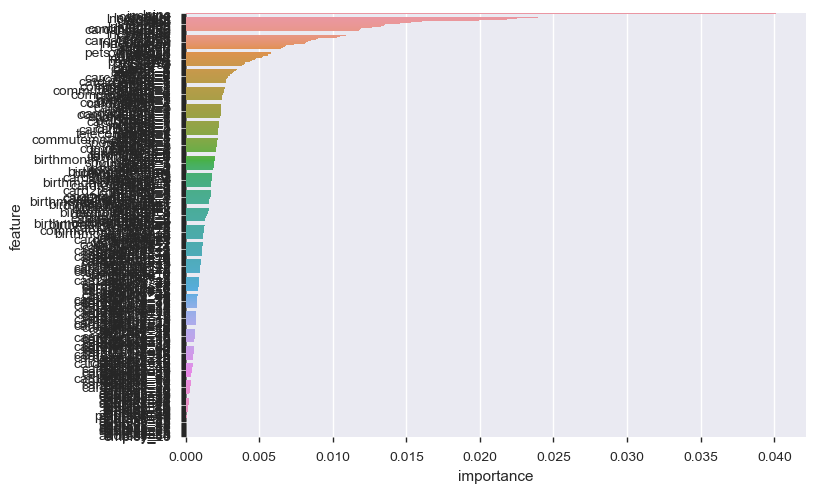

In [513]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [520]:
feature_rank.sort_values('importance',ascending=False,inplace=True)

In [522]:
feature_rank.head(50)

,rank,feature,importance
0,1,lninc,0.040117
1,2,income,0.030995
2,3,carvalue,0.028450
3,4,lnothdebt,0.023943
4,5,lncreddebt,0.022554
5,6,othdebt,0.021839
6,7,creddebt,0.019963
7,8,debtinc,0.016042
8,9,age,0.015320
9,10,longten,0.014542


In [908]:
y_pred_train_rf = radm_clf.predict(train_X)

In [909]:
y_pred_test_rf = radm_clf.predict(test_X)

In [911]:
#Train Data
print("For Training Data :")
MAPE_train = np.mean(np.abs(train_Y - y_pred_train_rf)/train_Y )
print('MAPE = ',MAPE_train)


RMSE_train = metrics.mean_squared_error(train_Y , y_pred_train_rf)
print("RMSE = ",RMSE_train)

Corr_train = stats.stats.pearsonr(train_Y , y_pred_train_rf)
print('Correlation = ',Corr_train)


#Test Data
print("For Testing Data :")
MAPE_test = np.mean(np.abs(test_Y - y_pred_test_rf)/test_Y )
print('MAPE = ',MAPE_test)

RMSE_test = metrics.mean_squared_error(test_Y , y_pred_test_rf)
print("RMSE = ",RMSE_test)

Corr_test = stats.stats.pearsonr(test_Y , y_pred_test_rf)
print('Correlation = ',Corr_test)

For Training Data :
MAPE =  0.02876249790047395
RMSE =  0.04599919432143583
Correlation =  (0.9738083083121842, 0.0)
For Testing Data :
MAPE =  0.0782127981410336
RMSE =  0.3276849870352026
Correlation =  (0.43087588159642815, 7.488678411971024e-69)


## Gradient Boost :

In [912]:
from sklearn.ensemble import GradientBoostingRegressor

In [913]:
# top 20 vars. selected
gbm = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
gbm.fit( train_X, train_Y )

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [916]:
y_pred_train_gbm = gbm.predict(train_X)

In [917]:
y_pred_test_gbm = gbm.predict(test_X)

In [918]:
#Train Data
print("For Training Data :")
MAPE_train = np.mean(np.abs(train_Y - y_pred_train_gbm)/train_Y )
print('MAPE = ',MAPE_train)


RMSE_train = metrics.mean_squared_error(train_Y , y_pred_train_gbm)
print("RMSE = ",RMSE_train)

Corr_train = stats.stats.pearsonr(train_Y , y_pred_train_gbm)
print('Correlation = ',Corr_train)


#Test Data
print("For Testing Data :")
MAPE_test = np.mean(np.abs(test_Y - y_pred_test_gbm)/test_Y )
print('MAPE = ',MAPE_test)

RMSE_test = metrics.mean_squared_error(test_Y , y_pred_test_gbm)
print("RMSE = ",RMSE_test)

Corr_test = stats.stats.pearsonr(test_Y , y_pred_test_gbm)
print('Correlation = ',Corr_test)

For Training Data :
MAPE =  0.0681688882973996
RMSE =  0.252979967089151
Correlation =  (0.6437650911224875, 0.0)
For Testing Data :
MAPE =  0.07345124796767451
RMSE =  0.290154263592098
Correlation =  (0.5257848987561055, 2.160724548793366e-107)


### Assumption Check :

In [872]:
import pylab

In [869]:
results.resid.mean()

-1.4394288444285074e-14

C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


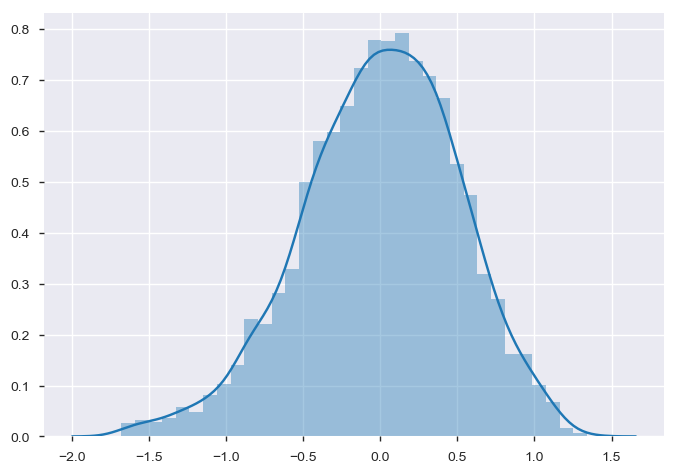

In [870]:
sns.distplot(results.resid)
plt.show()

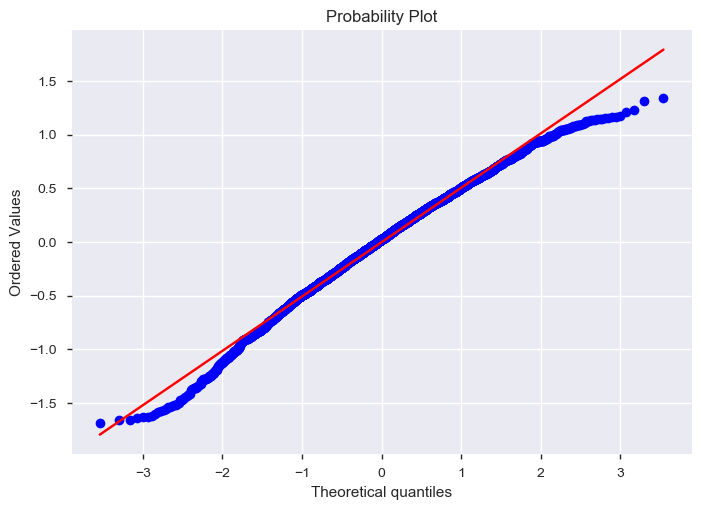

In [873]:
stats.probplot( results.resid, dist="norm", plot=pylab )
pylab.show()

In [876]:
# 5th assumption check :-
print(train_Y.corr(train_Y-Y_Pred_train))
print(test_Y.corr(test_Y-Y_Pred))

0.79909552571198
0.8151335941681443


In [879]:
data_updated['ln_total_spend'].corr(results.resid)

0.79909552571198

C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


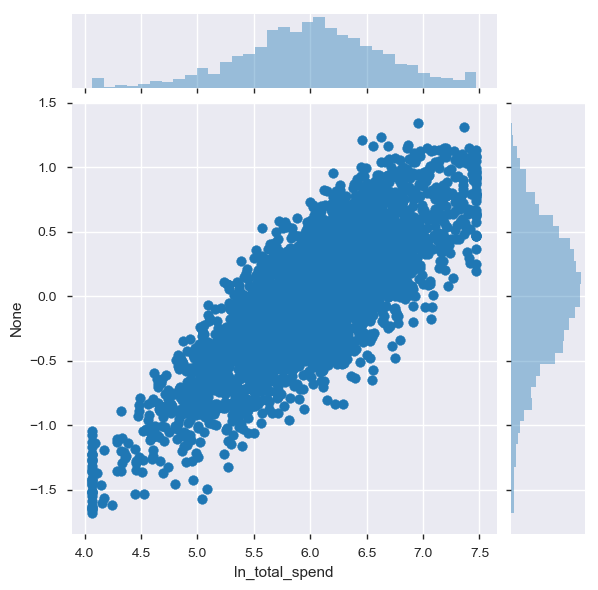

In [885]:
sns.jointplot(train_Y.loc[indexToConsider],results.resid)
plt.show()

C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


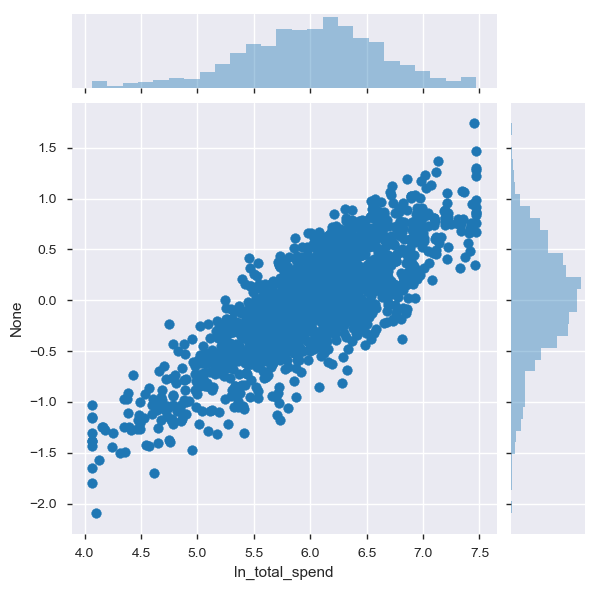

In [886]:
sns.jointplot(test_Y,test_Y-Y_Pred)
plt.show()

### Decile Analysis :

In [935]:
X_col['train_ln_pred'] = Y_Pred_train
Xt_['test_ln_pred'] = Y_Pred

In [936]:
X_col['train_pred']= np.exp(X_col['train_ln_pred'])
Xt_['test_pred'] = np.exp(Xt_['test_ln_pred'])

In [937]:
X_col['train_tot_spend']=np.exp(train_Y.loc[indexToConsider])
Xt_['test_tot_spend']=np.exp(test_Y)

In [938]:
X_col['Deciles'] = pd.qcut(X_col['train_pred'],10,labels=False)
Xt_['Deciles'] = pd.qcut(Xt_['test_pred'],10,labels=False)

In [894]:
# decile anaylsis for train
Predicted_avg = X_col[['Deciles','train_pred']].groupby('Deciles').mean().sort_index(ascending=False)['train_pred']
Actual_avg = X_col[['Deciles','train_tot_spend']].groupby('Deciles').mean().sort_index(ascending=False)['train_tot_spend']

decile_anaylsis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)
decile_anaylsis_train

,train_pred,train_tot_spend
Deciles,,
9,842.587771,930.360202
8,624.897768,707.801465
7,535.572098,576.586770
6,464.329154,526.585867
5,411.640178,461.622890
4,370.508795,432.671879
3,337.063845,386.404769
2,307.318663,349.546606
1,276.608332,305.686895


In [895]:
# Decile Analysis for test data
Predicted_avg = Xt_[['Deciles','test_pred']].groupby('Deciles').mean().sort_index(ascending=False)['test_pred']
Actual_avg = Xt_[['Deciles','test_tot_spend']].groupby('Deciles').mean().sort_index(ascending=False)['test_tot_spend']

decile_anaylsis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)
decile_anaylsis_test

,test_pred,test_tot_spend
Deciles,,
9,820.560606,858.424563
8,613.430092,660.222083
7,523.648703,578.509749
6,465.965642,530.472099
5,408.412455,450.883416
4,367.537627,422.505400
3,336.385274,398.287451
2,309.981149,356.405051
1,281.331477,343.951733


In [896]:
decile_anaylsis_train.to_csv('Decile_analysis_train.csv')
decile_anaylsis_test.to_csv('Decile_analysis_test.csv')

### Cross-validation :

In [897]:
from sklearn.model_selection import cross_val_score

In [898]:
cv = cross_val_score( linreg, train_X.loc[indexToConsider], train_Y.loc[indexToConsider], scoring = 'r2', cv = 10 )
cv

array([0.31796714, 0.28659938, 0.36170883, 0.36767762, 0.36372443,
       0.24334808, 0.35803763, 0.34742186, 0.37178856, 0.38210045])

In [899]:
cv.mean()

0.3400373990261416